***
# 1.1 Coarse labeling for Bird 26
### JX, 03/07/2022
***
    Bird26:
    LS110395.9.28.2017PalmRagonesi.WAV
    
***

In [1]:
indv = "Bird26"

## Load up Note Dataframe

In [2]:
import pandas as pd
from pathlib2 import Path

from butcherbird.utils.paths import DATA_DIR

In [3]:
SAVE_LOC = DATA_DIR/'interim/raw_spectrogram/butcherbird_note_df.pickle'

In [4]:
note_df = pd.read_pickle(SAVE_LOC)
note_df.head()

,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,indvi,key,audio,rate,spectrogram
0,0,513.78,517.061923,3.281923,15,0,513.780000,513.905214,0.125214,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -7.356902671940375e-05, -0.000162745769...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,513.78,517.061923,3.281923,15,1,513.917747,513.980936,0.063188,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[0.0, 0.0014728324725323874, 0.002769917049663...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0,513.78,517.061923,3.281923,15,2,514.170000,514.480698,0.310698,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[0.0, 4.4531726447127805e-05, 4.62385657049665...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0,513.78,517.061923,3.281923,15,3,514.620783,515.310000,0.689217,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -3.2631556531601904e-06, -7.44037823939...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0,513.78,517.061923,3.281923,15,4,515.355217,515.660180,0.304964,Bird5,0,LS110143.10.12.2015GeoGreens_dn,"[-0.0, -2.958346783314775e-05, -7.119856074752...",44100,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


## Shift to Designated Individual

In [5]:
indv_df = note_df[note_df.indv == indv]
indv_df.head()

,phrase_nb,phrase_strt,phrase_end,phrase_len,note_cnt,note_nb,note_strt,note_end,note_len,indv,indvi,key,audio,rate,spectrogram
0,0,2.53,3.108940,0.578940,4,0,2.530000,2.565308,0.035308,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 1.046653124410034e-05, 2.781446748131873...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,2.53,3.108940,0.578940,4,1,2.582859,2.646042,0.063184,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -5.34641467372343e-06, -1.1688967129128...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0,2.53,3.108940,0.578940,4,2,2.754858,2.877196,0.122338,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 2.4410663172602654e-05, 5.92200898084064...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0,2.53,3.108940,0.578940,4,3,2.942109,3.108940,0.166831,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[-0.0, -0.00015404379157812003, -0.00030952889...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,1,7.66,9.269842,1.609842,6,0,7.660000,7.802573,0.142573,Bird26,0,LS110395.9.28.2017PalmRagonesi_dn,"[0.0, 5.444124866051962e-05, 0.000182190384940...",48000,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


## Perform Coarse Labeling

In [7]:
from butcherbird.label.label import labeler
from datetime import datetime

In [8]:
datetime.now().isoformat(timespec='minutes')

'2022-03-07T19:21'

In [9]:
indv_df, discoverable = labeler(indv_df,
                                label = 'hdbscan_labels', 
                                log_scaling_factor = 5, 
                                log_scaling_boolean = False,
                                lin_scaling_factor = 0.1, 
                                lin_scaling_boolean = True,
                                n_jobs = 36, 
                                verbosity = -1, 
                                min_dist = 0.1,
                                n_neighbors_factor = 0.01, 
                                stopping_nn = 50,
                                min_cluster_size_factor = 0.01,
                                stopping_cluster_size = 10)


/Initiating Labeler Unit
//lin-resize with factor 0.1


linear scaling spectrograms:   0%|          | 0/10866 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 219 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 2778 tasks      | elapsed:   20.3s


//Pad Spectrograms to 126 mode: center


[Parallel(n_jobs=-1)]: Done 10866 out of 10866 | elapsed:   21.3s finished


padding spectrograms:   0%|          | 0/10866 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 5536 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 10866 out of 10866 | elapsed:    1.6s finished


Nearest Neighbor Count: 108
/Projecting to UMAP...
using regular
UMAP(n_jobs=36, n_neighbors=108, verbose=-1)
Mon Mar  7 19:22:04 2022 Construct fuzzy simplicial set
Mon Mar  7 19:22:05 2022 Finding Nearest Neighbors
Mon Mar  7 19:22:05 2022 Building RP forest with 10 trees
Mon Mar  7 19:22:10 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	Stopping threshold met -- exiting after 3 iterations
Mon Mar  7 19:23:10 2022 Finished Nearest Neighbor Search
Mon Mar  7 19:23:13 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Mon Mar  7 19:23:27 2022 Finished embedding


/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/label/label.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df[umap_nm] = z


/Clustering with min_cluster_size = 108

Discovered 21 Clusters, potential subclusters discoverable in deeper layers




/home/AD/j8xing/syntax_rhythm_pbb/butcherbird/label/label.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indv_df.loc[:, label] = list(clusterer.labels_)


In [10]:
datetime.now().isoformat(timespec='minutes')

'2022-03-07T19:23'

## Construct Visualization of Coarse Labeling

In [12]:
from butcherbird.visualization.projections import scatter_spec
import matplotlib.pyplot as plt
import numpy as np

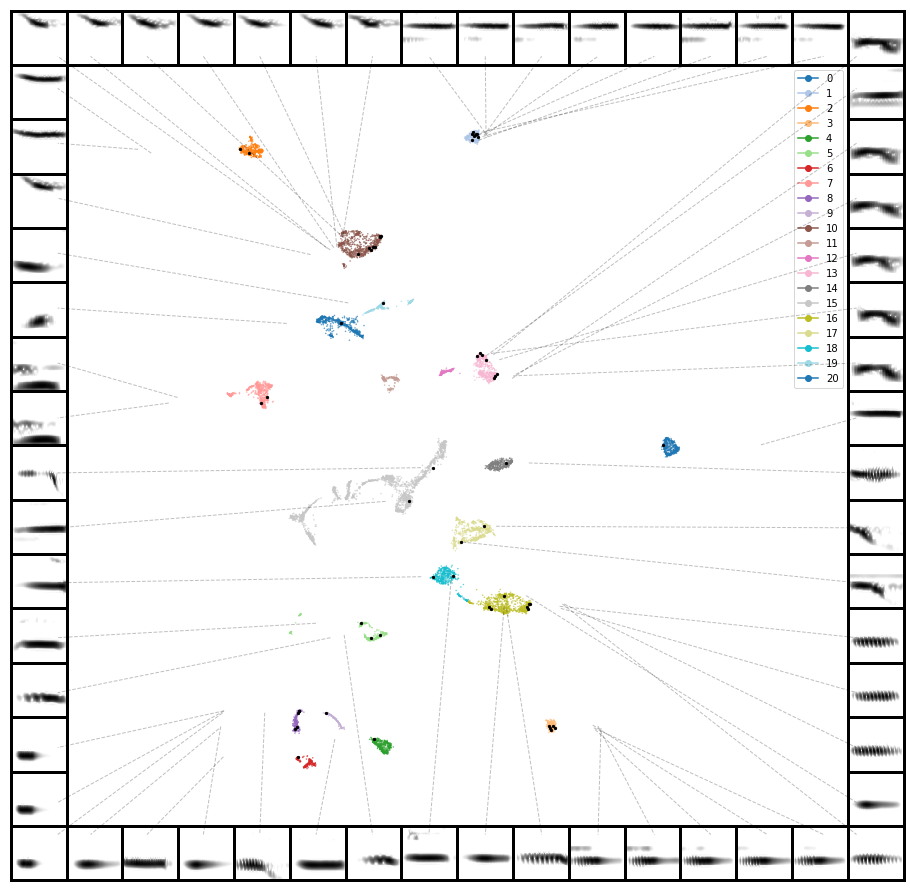

In [13]:
scatter_spec(
    np.vstack(indv_df.umap),
    indv_df.spectrogram, 
    column_size = 16,
    pal_color = 'tab20',
    color_points = False,
    enlarge_points = 5, 
    figsize = (16,16),
    scatter_kwargs = {
        'labels': list(indv_df['hdbscan_labels'].values),
        'alpha':0.75, 
        's': 0.25,
        'show_legend': True
    },
    matshow_kwargs = {
        'cmap': plt.cm.Greys
    },
    line_kwargs = {
        'lw':1,
        'ls':'dashed',
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset = 1000,
    border_line_width = 3,
);
plt.show()

## Save 

In [14]:
from butcherbird.utils.paths import DATA_DIR, ensure_dir
import pathlib2

In [15]:
SAVE_LOC = 'interim/coarse_labels/butcherbird_note_df_'+indv+'.pickle'

In [16]:
SAVE_LOC = DATA_DIR / SAVE_LOC

In [17]:
ensure_dir(SAVE_LOC)

In [18]:
indv_df.to_pickle(SAVE_LOC)